In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

## import the modelings packages 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

# a different linear regression package
import statsmodels.formula.api as smf
import statsmodels.api as sm

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_covid_perm = pd.read_csv("/content/drive/MyDrive/Final Project/live_us-counties.csv")
df_politic_perm = pd.read_csv("https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv", encoding = "latin-1")
df_vaccine_perm = pd.read_csv("/content/drive/MyDrive/Final Project/COVID-19_Vaccinations_in_the_United_States_County-2.csv")
#df_race_perm = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-alldata.csv", encoding = "latin-1")
df_income_perm = pd.read_csv("https://www.openintro.org/data/csv/county_complete.csv", encoding = "latin-1")
#https://www.openintro.org/data/?data=county_complete

# **Data Cleaning**

In [ ]:
df_covid = df_covid_perm
df_race = df_race_perm
df_income = df_income_perm
df_vaccine = df_vaccine_perm
df_politic = df_politic_perm

In [ ]:
print(df_covid.dtypes)
print(df_race.dtypes)
print(df_income.dtypes)
print(df_vaccine.dtypes)
print(df_politic.dtypes)

In [ ]:
df_income.head()

,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,age_under_5_2010,age_under_5_2017,age_under_18_2010,age_over_65_2010,age_over_65_2017,median_age_2017,female_2010,white_2010,black_2010,black_2017,native_2010,native_2017,asian_2010,asian_2017,pac_isl_2010,pac_isl_2017,other_single_race_2017,two_plus_races_2010,two_plus_races_2017,hispanic_2010,hispanic_2017,white_not_hispanic_2010,white_not_hispanic_2017,speak_english_only_2017,no_move_in_one_plus_year_2010,foreign_born_2010,foreign_spoken_at_home_2010,women_16_to_50_birth_rate_2017,...,bachelors_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_asian_or_pac_isl_2019,households_speak_limited_english_2019,households_speak_other_2019,households_speak_other_indo_euro_lang_2019,households_speak_spanish_2019,housing_mobile_homes_2019,housing_one_unit_structures_2019,housing_two_unit_structures_2019,hs_grad_2019,mean_household_income_2019,mean_work_travel_2019,median_age_2019,median_household_income_2019,median_individual_income_2019,median_individual_income_age_25plus_2019,native_2019,other_single_race_2019,pac_isl_2019,per_capita_income_2019,persons_per_household_2019,pop_2019,poverty_2019,poverty_65_and_over_2019,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,55278.0,55504.0,6.6,5.7,26.8,12.0,14.3,37.8,51.3,78.5,17.7,9.55,0.4,0.15,0.9,0.47,NaN,0.04,0.65,1.6,0.84,2.4,2.67,77.2,75.42,96.2,86.3,2.0,3.7,7.4,...,26.6,19.0,2.8,80.6,73.0,78.4,21397,1.8,0.7,0.2,0.3,2.9,26.7,17.3,73.3,88.5,75326,24.4,38.2,58731,29725,40778,0.3,0.7,0.0,29819,2.56,55380,15.2,8.7,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Alabama,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,207509.0,212628.0,6.1,5.7,23.0,16.8,19.0,42.6,51.1,85.7,9.4,4.77,0.7,0.41,0.7,0.35,NaN,0.00,0.39,1.5,0.82,4.4,4.44,83.5,83.08,94.5,83.0,3.6,5.5,5.1,...,31.9,9.3,4.6,81.8,76.3,81.7,80930,0.6,1.2,0.0,1.8,4.6,24.8,11.5,75.2,90.8,80986,NaN,43.0,58320,29802,37897,0.8,1.1,0.0,32626,2.59,212830,10.4,7.4,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Alabama,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,25774.0,25270.0,6.2,5.5,21.9,14.2,17.4,39.7,46.9,48.0,46.9,24.02,0.4,0.10,0.4,0.31,NaN,0.00,1.87,0.9,0.41,5.1,4.21,46.8,45.74,94.3,83.0,2.8,4.7,7.2,...,11.6,47.6,4.4,60.5,51.9,64.2,9345,0.6,1.6,0.0,1.1,5.2,39.1,26.1,60.9,73.2,47068,NaN,40.4,32525,17963,27434,0.3,3.6,0.0,18473,2.41,25361,30.7,16.8,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Alabama,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,22633.0,22668.0,6.0,5.7,22.7,12.7,15.1,39.8,46.3,75.8,22.0,11.03,0.3,0.18,0.1,0.00,NaN,0.00,0.02,0.9,0.42,1.8,2.35,75.0,74.62,97.8,90.5,0.7,1.5,7.6,...,10.4,22.3,2.6,69.2,54.7,66.6,6891,0.0,0.6,0.0,0.5,1.9,25.6,29.7,74.4,79.1,60182,NaN,40.9,47542,21958,28789,0.1,0.0,0.0,20778,2.99,22493,NaN,NaN,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Alabama,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,57562.0,58013.0,6.3,6.1,24.6,14.7,17.4,40.9,50.5,92.6,1.3,0.79,0.5,0.18,0.2,0.07,NaN,0.00,0.37,1.2,0.85,8.1,9.01,88.9,87.37,92.3,87.2,4.7,7.2,5.6,...,13.1,1.6,9.3,73.0,63.5,70.1,20847,0.1,1.8,0.2,0.9,6.6,21.2,24.0,78.8,80.5,65639,NaN,40.7,49358,26976,39004,0.1,0.9,0.0,24747,2.74,57681,13.6,10.9,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9


In [ ]:
df_income["name"] = df_income["name"].str.replace(" County", "")
df_income = df_income.rename(columns={"name": "county"})
keep = df_income.columns[1]
df_income = df_income[["fips", "state", "county", "white_2019", "black_2019", "native_2019", "asian_2019", 
        "pac_isl_2019", "other_single_race_2019", "two_plus_races_2019", "hispanic_2019", "white_not_hispanic_2019", 
        "median_age_2019", "hs_grad_2019", "bachelors_2019", "mean_household_income_2019", "median_household_income_2019", 
        "median_individual_income_2019", "per_capita_income_2019", "persons_per_household_2019", "poverty_2019", 
        "unemployment_rate_2019", "uninsured_2019", "household_has_computer_2019", "household_has_broadband_2019", 
        "household_has_smartphone_2019", "households_2019", "pop_2019"]]
df_income.head()

,fips,state,county,white_2019,black_2019,native_2019,asian_2019,pac_isl_2019,other_single_race_2019,two_plus_races_2019,hispanic_2019,white_not_hispanic_2019,median_age_2019,hs_grad_2019,bachelors_2019,mean_household_income_2019,median_household_income_2019,median_individual_income_2019,per_capita_income_2019,persons_per_household_2019,poverty_2019,unemployment_rate_2019,uninsured_2019,household_has_computer_2019,household_has_broadband_2019,household_has_smartphone_2019,households_2019,pop_2019
0,1001,Alabama,Autauga,76.8,19.0,0.3,1.0,0.0,0.7,2.2,2.8,74.6,38.2,88.5,26.6,75326,58731,29725,29819,2.56,15.2,3.5,7.1,73.0,80.6,78.4,21397,55380
1,1003,Alabama,Baldwin,86.2,9.3,0.8,0.9,0.0,1.1,1.7,4.6,83.1,43.0,90.8,31.9,80986,58320,29802,32626,2.59,10.4,4.0,8.9,76.3,81.8,81.7,80930,212830
2,1005,Alabama,Barbour,46.8,47.6,0.3,0.5,0.0,3.6,1.2,4.4,45.8,40.4,73.2,11.6,47068,32525,17963,18473,2.41,30.7,9.4,11.3,51.9,60.5,64.2,9345,25361
3,1007,Alabama,Bibb,76.8,22.3,0.1,0.1,0.0,0.0,0.6,2.6,74.5,40.9,79.1,10.4,60182,47542,21958,20778,2.99,NaN,7.0,10.7,54.7,69.2,66.6,6891,22493
4,1009,Alabama,Blount,95.5,1.6,0.1,0.4,0.0,0.9,1.6,9.3,86.9,40.7,80.5,13.1,65639,49358,26976,24747,2.74,13.6,3.1,10.8,63.5,73.0,70.1,20847,57681


In [ ]:
df_covid = df_covid[df_covid.date == "2021-07-27"]
df_covid = df_covid.drop(columns = ["date", "fips"])
df_covid.head()

,county,state,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,Autauga,Alabama,7435,113.0,6229.0,101.0,1206.0,12.0
1,Baldwin,Alabama,23922,325.0,16839.0,245.0,7083.0,80.0
2,Barbour,Alabama,2437,61.0,1364.0,43.0,1073.0,18.0
3,Bibb,Alabama,2814,65.0,2264.0,41.0,550.0,24.0
4,Blount,Alabama,7195,139.0,5495.0,118.0,1700.0,21.0


In [ ]:
df_race = df_race[df_race.AGEGRP == 0]
df_race = df_race[df_race.YEAR == 12]
df_race["CTYNAME"] = df_race["CTYNAME"].str.replace(" County", "")
df_race = df_race.drop(columns = ["COUNTY", "AGEGRP", "SUMLEV", "YEAR", "STATE"])
df_race = df_race.rename(columns={"CTYNAME": "county"})
df_race = df_race.rename(columns={"STNAME": "state"})
df_race = df_race[["state", "county", "TOT_MALE", "TOT_FEMALE", "TOT_POP"]]
df_race.head()

,state,county,TOT_MALE,TOT_FEMALE,TOT_POP
209,Alabama,Autauga,27092,28777,55869
437,Alabama,Baldwin,108247,114987,223234
665,Alabama,Barbour,13064,11622,24686
893,Alabama,Bibb,11929,10465,22394
1121,Alabama,Blount,28472,29354,57826


In [ ]:
df_politic = df_politic[["per_point_diff", "county_fips"]]
df_politic = df_politic.rename(columns={"county_fips": "fips"})
df_politic.head()

,per_point_diff,fips
0,0.444184,1001
1,0.537623,1003
2,0.076631,1005
3,0.577280,1007
4,0.800022,1009


In [ ]:
df_vaccine = df_vaccine[df_vaccine.Date == "07/27/2021"]
df_vaccine = df_vaccine.rename(columns={"FIPS": "fips"})
df_vaccine = df_vaccine[["fips", "Series_Complete_Pop_Pct", "Administered_Dose1_Pop_Pct"]]
df_vaccine = df_vaccine[df_vaccine.fips != "UNK"]
try:
  df_vaccine["fips"] = df_vaccine["fips"].astype(int)
except ValueError:
  a = 0
df_vaccine.head()


,fips,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct
6564,37187,32.8,40.0
6565,53017,46.3,51.2
6566,37001,43.1,48.9
6567,47021,35.5,39.5
6568,26157,36.7,38.6


In [ ]:
df_vaccine.to_csv("/content/drive/MyDrive/Coivd data that you want to use.csv")

In [ ]:
df_incomplete = df_covid.merge(df_income)
df1 = df_incomplete.merge(df_race)
df2 = df1.merge(df_vaccine)
df = df2.merge(df_politic)
df["cases_per_capita"] = df.cases/df.pop_2019
df["male_2019"] = df.TOT_MALE / df.TOT_POP * 100
df = df.drop(columns = ["pop_2019", "TOT_MALE", "TOT_FEMALE"])
df.head()

,county,state,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,fips,white_2019,black_2019,native_2019,asian_2019,pac_isl_2019,other_single_race_2019,two_plus_races_2019,hispanic_2019,white_not_hispanic_2019,median_age_2019,hs_grad_2019,bachelors_2019,mean_household_income_2019,median_household_income_2019,median_individual_income_2019,per_capita_income_2019,persons_per_household_2019,poverty_2019,unemployment_rate_2019,uninsured_2019,household_has_computer_2019,household_has_broadband_2019,household_has_smartphone_2019,households_2019,TOT_POP,Series_Complete_Pop_Pct,Administered_Dose1_Pop_Pct,per_point_diff,cases_per_capita,male_2019
0,Autauga,Alabama,7435,113.0,6229.0,101.0,1206.0,12.0,1001,76.8,19.0,0.3,1.0,0.0,0.7,2.2,2.8,74.6,38.2,88.5,26.6,75326,58731,29725,29819,2.56,15.2,3.5,7.1,73.0,80.6,78.4,21397,55869,26.1,34.3,0.444184,0.134254,48.492008
1,Baldwin,Alabama,23922,325.0,16839.0,245.0,7083.0,80.0,1003,86.2,9.3,0.8,0.9,0.0,1.1,1.7,4.6,83.1,43.0,90.8,31.9,80986,58320,29802,32626,2.59,10.4,4.0,8.9,76.3,81.8,81.7,80930,223234,31.4,40.9,0.537623,0.112400,48.490373
2,Barbour,Alabama,2437,61.0,1364.0,43.0,1073.0,18.0,1005,46.8,47.6,0.3,0.5,0.0,3.6,1.2,4.4,45.8,40.4,73.2,11.6,47068,32525,17963,18473,2.41,30.7,9.4,11.3,51.9,60.5,64.2,9345,24686,27.7,34.4,0.076631,0.096092,52.920684
3,Bibb,Alabama,2814,65.0,2264.0,41.0,550.0,24.0,1007,76.8,22.3,0.1,0.1,0.0,0.0,0.6,2.6,74.5,40.9,79.1,10.4,60182,47542,21958,20778,2.99,NaN,7.0,10.7,54.7,69.2,66.6,6891,22394,22.5,29.5,0.577280,0.125106,53.268733
4,Blount,Alabama,7195,139.0,5495.0,118.0,1700.0,21.0,1009,95.5,1.6,0.1,0.4,0.0,0.9,1.6,9.3,86.9,40.7,80.5,13.1,65639,49358,26976,24747,2.74,13.6,3.1,10.8,63.5,73.0,70.1,20847,57826,19.3,24.4,0.800022,0.124738,49.237367


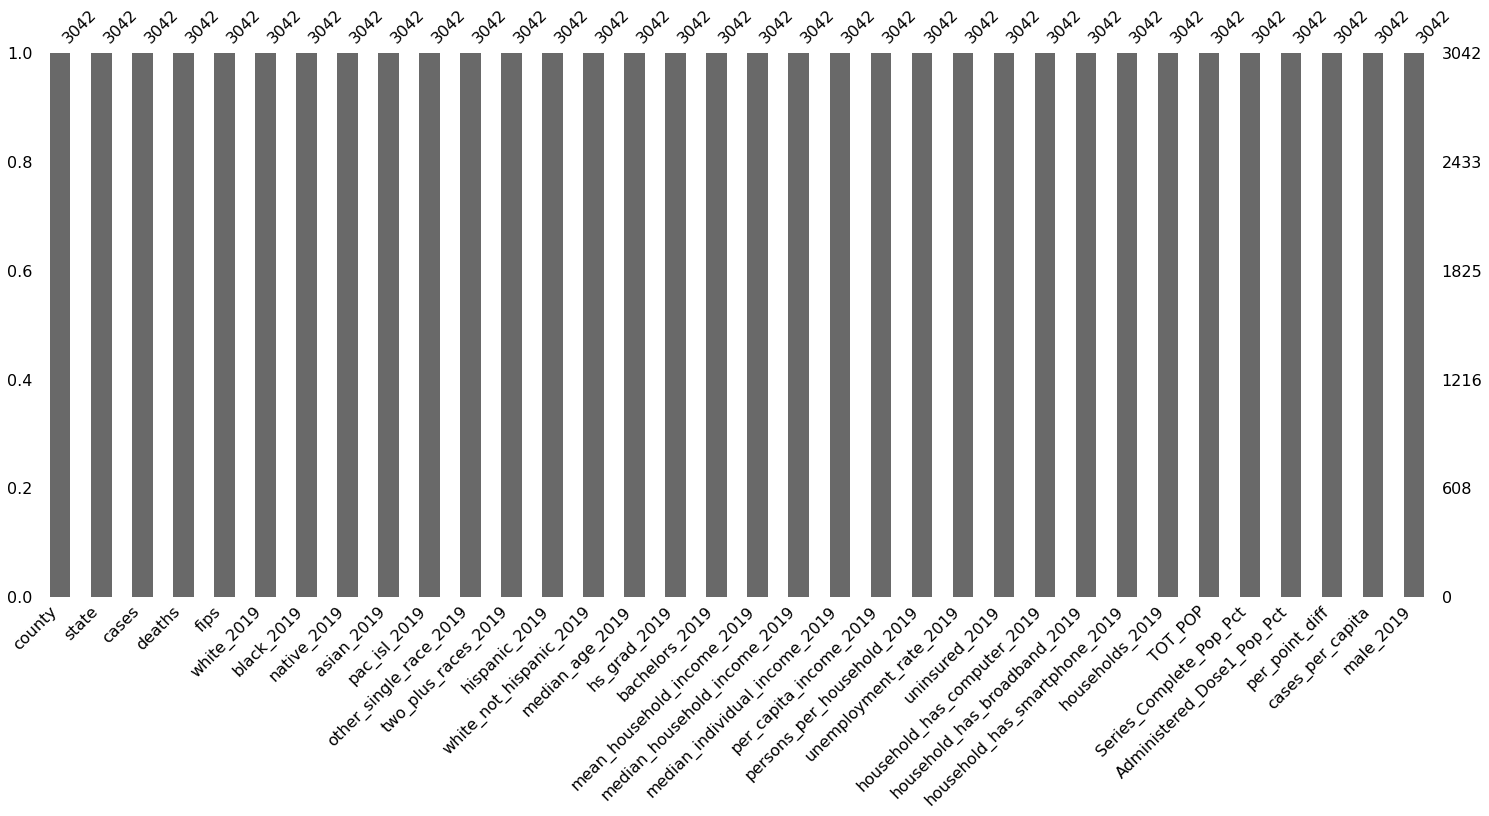

In [ ]:
import missingno as msno
df = df.drop(columns = ["confirmed_cases", "confirmed_deaths", "probable_deaths", "probable_cases", "poverty_2019"])
msno.bar(df)

In [ ]:
columns = df.columns
columns = columns.drop(["county", "state", "cases_per_capita", "fips", "cases"])
df_num = df.loc[:, columns]
fig, axes = plt.subplots(9, 3, figsize=(20, 40))

for i, ax in enumerate(axes.ravel()):
    ax.plot(df_num.iloc[:, i], df.cases_per_capita, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, df_num.columns[i]))
    ax.set_ylabel("Cases Per Capita")
plt.tight_layout()
plt.show()

In [ ]:
#df_test["non-white"] = df["black_2019"] + df["asian_2019"] + df["two_plus_races_2019"] + df["native_2019"] + df["pac_isl_2019"]
df_test = df[["male_2019", "median_age_2019", "household_has_computer_2019", "per_point_diff", 
              "Series_Complete_Pop_Pct", "two_plus_races_2019",
              "unemployment_rate_2019", "black_2019", "TOT_POP", "cases_per_capita"]]
df1 = df_test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = df1.columns
columns = columns.drop(["cases_per_capita"])
df1[columns] = scaler.fit_transform(df[columns])
df1.head()

In [ ]:
simpler = ""
for thing in df_test.columns:
  if thing != "cases_per_capita" and thing != "black_2019":
    simpler += thing + " + "
simpler += "black_2019"
print(simpler)
simpler2 = 'cases_per_capita ~ ' + simpler

lm = smf.ols(formula= simpler2, data=df_test).fit()

# print the summary for the model coefficients
lm.summary()


male_2019 + median_age_2019 + household_has_computer_2019 + per_point_diff + Series_Complete_Pop_Pct + two_plus_races_2019 + unemployment_rate_2019 + TOT_POP + black_2019


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cases_per_capita   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     132.3
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          9.89e-211
Time:                        13:31:24   Log-Likelihood:                 6838.1
No. Observations:                3042   AIC:                        -1.366e+04
Df Residuals:                    3032   BIC:                        -1.360e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.1058      0.000    227.951      0.000       0.105       0.107
male_2019                       0.0051      0.000     10.676      0.000       0.004       0.006
median_age_2019                -0.0128      0.000    -25.751      0.000      -0.014      -0.012
household_has_computer_2019    -0.0084      0.001    -13.066      0.000      -0.010      -0.007
per_point_diff                  0.0082      0.001     11.461      0.000       0.007       0.010
Series_Complete_Pop_Pct         0.0063      0.001     11.009      0.000       0.005       0.007
two_plus_races_2019            -0.0018      0.000     -3.601      0.000      -0.003      -0.001
unemployment_rate_2019         -0.0027      0.001     -4.803      0.000      -0.004      -0.002
TOT_POP                         0.0020      0.001      3.886      0.000       0.001       0.003
black_2019                      0.0030      0.001      4.611      0.000       0.002       0.004
==============================================================================
Omnibus:                      723.143   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6886.315
Skew:                           0.851   Prob(JB):                         0.00
Kurtosis:                      10.172   Cond. No.                         2.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

columns1 = df_test.columns
columns1 = columns1.drop(["cases_per_capita"])
X = df_test[columns1]
y = df_test.cases_per_capita

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

rf_model = RandomForestRegressor(max_depth = 6, min_samples_leaf = 5)
rf_model = rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R^2: " + str(rf_model.score(X_test,y_test)))

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)
y_pred = linreg2.predict(X_test)

print("Root Mean Square Error: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("R^2: " + str(linreg2.score(X_test,y_test)))

Root Mean Squared Error (RMSE): 0.024441986012103428
R^2: 0.37090471129029645
Root Mean Square Error: 0.025406097504798518
R^2: 0.32029671111163294


In [ ]:
'''
df1 = df.drop(columns = ["hispanic_2019", "white_not_hispanic_2019"])
df1 = df1.drop(columns = ["hs_grad_2019"])
df1 = df1.drop(columns = ["household_has_broadband_2019", "Administered_Dose1_Pop_Pct"])
df1 = df1.drop(columns = ["median_household_income_2019", "median_individual_income_2019", "households_2019"])
df.corr()
'''

'\ndf1 = df.drop(columns = ["hispanic_2019", "white_not_hispanic_2019"])\ndf1 = df1.drop(columns = ["hs_grad_2019"])\ndf1 = df1.drop(columns = ["household_has_broadband_2019", "Administered_Dose1_Pop_Pct"])\ndf1 = df1.drop(columns = ["median_household_income_2019", "median_individual_income_2019", "households_2019"])\ndf.corr()\n'

# **Model**

In [ ]:
columns1 = df1.columns
columns1 = columns1.drop("cases_per_capita")
X = df1[columns1]
y = df1.cases_per_capita

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [ ]:
print(X_train.mean())
print("\n\n")
print(X_test.mean())

male_2019                      0.010448
median_age_2019               -0.010702
household_has_computer_2019    0.002742
per_point_diff                 0.005407
Series_Complete_Pop_Pct        0.001813
two_plus_races_2019            0.007211
unemployment_rate_2019        -0.001207
black_2019                    -0.008568
TOT_POP                       -0.007900
dtype: float64



male_2019                     -0.031316
median_age_2019                0.032078
household_has_computer_2019   -0.008219
per_point_diff                -0.016208
Series_Complete_Pop_Pct       -0.005435
two_plus_races_2019           -0.021613
unemployment_rate_2019         0.003618
black_2019                     0.025681
TOT_POP                        0.023680
dtype: float64


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

## Train simple regression tree
simple_tree = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 5, min_samples_split = 12)
simple_tree= simple_tree.fit(X, y)

In [ ]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(simple_tree, out_file=None, 
                                feature_names = columns1, 
                                class_names = ['cases_per_capita'])  
graph = graphviz.Source(dot_data)  
graph 

## **Random Forest**

In [ ]:
from sklearn import metrics

#pred = simple_tree.predict(X_test)

result = simple_tree.score(X_test, y_test)
print(result)
'''
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)

# gives you the points for the roc-curve 
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Forest_ROC')
plt.show()
'''

0.4710134687459044


'\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import roc_curve\nlogit_roc_auc = roc_auc_score(y_test, pred)\n\n# gives you the points for the roc-curve \nfpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])\n\n\nplt.figure()\nplt.plot(fpr, tpr, label=\'Random Forest (area = %0.2f)\' % logit_roc_auc)\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic\')\nplt.legend(loc="lower right")\nplt.savefig(\'Forest_ROC\')\nplt.show()\n'

In [ ]:
from sklearn.model_selection import train_test_split
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
rf_model = RandomForestRegressor(max_depth = 6, min_samples_leaf = 5)

# Fit on training data
rf_model = rf_model.fit(X_train, y_train)

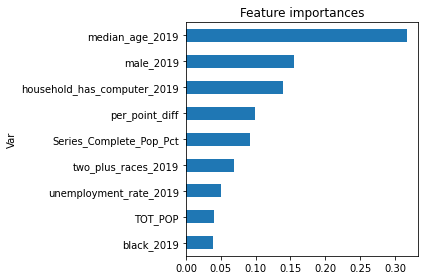

In [ ]:
## visualize feature importance
importances = rf_model.feature_importances_

forest_importances = pd.Series(importances, index=X_train.columns).sort_values()
fig, ax = plt.subplots()
forest_importances.plot.barh()
ax.set_title("Feature importances")
ax.set_ylabel("Var")
fig.tight_layout()

In [ ]:
import numpy as np
from sklearn import metrics

pred = rf_model.predict(X_test)

print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R^2: " + str(rf_model.score(X_test,y_test)))

Root Mean Squared Error (RMSE): 0.024525210781628955
R^2: 0.36661328858852227


## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# print the coefficients

print(linreg.intercept_)
print(linreg.coef_)

0.10589838255918829
[ 0.00509923 -0.01245196 -0.00765377  0.00840073  0.00561966 -0.00171684
 -0.00227221  0.00296562  0.0025961 ]


In [ ]:
y_pred = linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.025406097504798518

In [ ]:
print(columns1)

Index(['male_2019', 'median_age_2019', 'household_has_computer_2019',
       'per_point_diff', 'Series_Complete_Pop_Pct', 'two_plus_races_2019',
       'unemployment_rate_2019', 'black_2019', 'TOT_POP'],
      dtype='object')


In [ ]:
# create a fitted model with all three features
lm = smf.ols(formula='cases_per_capita ~ white_2019 + black_2019 + native_2019 + \
        asian_2019 + pac_isl_2019 + other_single_race_2019 + two_plus_races_2019 + hispanic_2019 \
       + white_not_hispanic_2019 + median_age_2019 + hs_grad_2019 + \
       bachelors_2019 + mean_household_income_2019+ \
       per_capita_income_2019 + persons_per_household_2019 + \
       unemployment_rate_2019 + uninsured_2019 + \
       household_has_computer_2019 + household_has_broadband_2019 + \
       household_has_smartphone_2019 + TOT_POP + \
       male_2019 + Series_Complete_Pop_Pct', data=df).fit()

# print the summary for the model coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cases_per_capita   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     54.94
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          3.54e-209
Time:                        13:31:27   Log-Likelihood:                 6866.1
No. Observations:                3042   AIC:                        -1.368e+04
Df Residuals:                    3018   BIC:                        -1.354e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.3778      0.641      2.150      0.032       0.121       2.634
white_2019                       -0.0133      0.006     -2.064      0.039      -0.026      -0.001
black_2019                       -0.0125      0.006     -1.949      0.051      -0.025    7.48e-05
native_2019                      -0.0119      0.006     -1.852      0.064      -0.024       0.001
asian_2019                       -0.0137      0.006     -2.137      0.033      -0.026      -0.001
pac_isl_2019                     -0.0139      0.007     -2.123      0.034      -0.027      -0.001
other_single_race_2019           -0.0133      0.006     -2.067      0.039      -0.026      -0.001
two_plus_races_2019              -0.0139      0.006     -2.172      0.030      -0.026      -0.001
hispanic_2019                     0.0009      0.001      1.210      0.226      -0.001       0.002
white_not_hispanic_2019           0.0008      0.001      1.091      0.275      -0.001       0.002
median_age_2019                  -0.0019      0.000    -13.424      0.000      -0.002      -0.002
hs_grad_2019                      0.0001      0.000      0.863      0.388      -0.000       0.000
bachelors_2019                   -0.0005      0.000     -4.593      0.000      -0.001      -0.000
mean_household_income_2019     3.722e-07   1.55e-07      2.400      0.016    6.81e-08    6.76e-07
per_capita_income_2019        -6.927e-07      4e-07     -1.731      0.084   -1.48e-06    9.18e-08
persons_per_household_2019       -0.0128      0.004     -3.608      0.000      -0.020      -0.006
unemployment_rate_2019           -0.0017      0.000     -6.838      0.000      -0.002      -0.001
uninsured_2019                   -0.0002      0.000     -1.410      0.159      -0.000    8.15e-05
household_has_computer_2019      -0.0014      0.000     -9.803      0.000      -0.002      -0.001
household_has_broadband_2019      0.0002      0.000      1.189      0.235      -0.000       0.000
household_has_smartphone_2019     0.0008      0.000      6.192      0.000       0.001       0.001
TOT_POP                        6.179e-09   1.67e-09      3.700      0.000     2.9e-09    9.45e-09
male_2019                         0.0023      0.000      9.298      0.000       0.002       0.003
Series_Complete_Pop_Pct           0.0002   3.86e-05      5.134      0.000       0.000       0.000
==============================================================================
Omnibus:                      869.134   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11364.288
Skew:                           0.981   Prob(JB):                         0.00
Kurtosis:                      12.263   Cond. No.                     4.84e+08
==========================================

In [ ]:
from sklearn.linear_model import LinearRegression

columns2 = df1.columns
columns2 = columns2.drop(["cases_per_capita"])
X = df1[columns2]
y = df1.cases_per_capita

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)

# print the coefficients

print(linreg2.intercept_)
print(linreg2.coef_)

y_pred = linreg2.predict(X_test)
y_pred2 = linreg2.predict(X)

df1["prediction"] = y_pred2
print("Root Mean Square Error: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

0.10589838255918829
[ 0.00509923 -0.01245196 -0.00765377  0.00840073  0.00561966 -0.00171684
 -0.00227221  0.00296562  0.0025961 ]
Root Mean Square Error: 0.025406097504798518


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#cases = 0.00509737*male - 0.01244741*median_age_2019 + 

In [ ]:
columns = df1.columns
columns = columns.drop(["cases_per_capita", "prediction"])
df1[columns] = df[columns]
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,male_2019,median_age_2019,household_has_computer_2019,per_point_diff,Series_Complete_Pop_Pct,two_plus_races_2019,unemployment_rate_2019,black_2019,TOT_POP,cases_per_capita,prediction
0,48.492008,38.2,73.0,0.444184,26.1,2.2,3.5,19.0,55869,0.134254,0.112035
1,48.490373,43.0,76.3,0.537623,31.4,1.7,4.0,9.3,223234,0.112400,0.101985
2,52.920684,40.4,51.9,0.076631,27.7,1.2,9.4,47.6,24686,0.096092,0.126162
3,53.268733,40.9,54.7,0.577280,22.5,0.6,7.0,22.3,22394,0.125106,0.132306
4,49.237367,40.7,63.5,0.800022,19.3,1.6,3.1,1.6,57826,0.124738,0.119706


In [ ]:
def predictCases(df_func):
  columns = ["male_2019", "median_age_2019", "household_has_computer_2019", "per_point_diff", 
             "Series_Complete_Pop_Pct", "two_plus_races_2019","unemployment_rate_2019", 
             "black_2019", "TOT_POP"]
  for thing in columns:
    if thing not in df_func.columns:
      df_func[thing] = df1[thing].mean
  df_func[columns] = scaler.fit_transform(df_func[columns])
  y_pred = linreg2.predict(df_func[columns])
  return y_pred

# Graphing

In [ ]:
#df_more_men = df1.filter(df1.male_2019)
df_more_men = df1[df1.male_2019 > 50]
df_more_men.head()

,male_2019,median_age_2019,household_has_computer_2019,per_point_diff,Series_Complete_Pop_Pct,two_plus_races_2019,unemployment_rate_2019,black_2019,TOT_POP,cases_per_capita,prediction
2,52.920684,40.4,51.9,0.076631,27.7,1.2,9.4,47.6,24686,0.096092,0.126162
3,53.268733,40.9,54.7,0.577280,22.5,0.6,7.0,22.3,22394,0.125106,0.132306
5,54.529255,40.2,52.5,-0.498591,34.2,0.8,4.1,74.8,10101,0.122560,0.127769
18,50.032824,48.4,55.3,0.334915,29.0,0.0,2.3,33.6,10663,0.107930,0.109981
26,50.296181,40.0,46.3,0.374041,22.1,1.0,11.5,32.1,36633,0.113879,0.126372


In [ ]:
predictionMeanMore=df_more_men["prediction"].mean()
actualMeanMore=df_more_men["cases_per_capita"].mean()

In [ ]:
df_less_men = df1[df1.male_2019 < 50]
predictionMeanLess=df_less_men["prediction"].mean()
actualMeanLess= df_less_men["cases_per_capita"].mean()


In [ ]:
listToPlot = [predictionMeanMore, actualMeanMore, predictionMeanLess, actualMeanLess]
listY = ["More Men Pred", "More Men Actual", "Less Men Pred", "More Men Actual"]

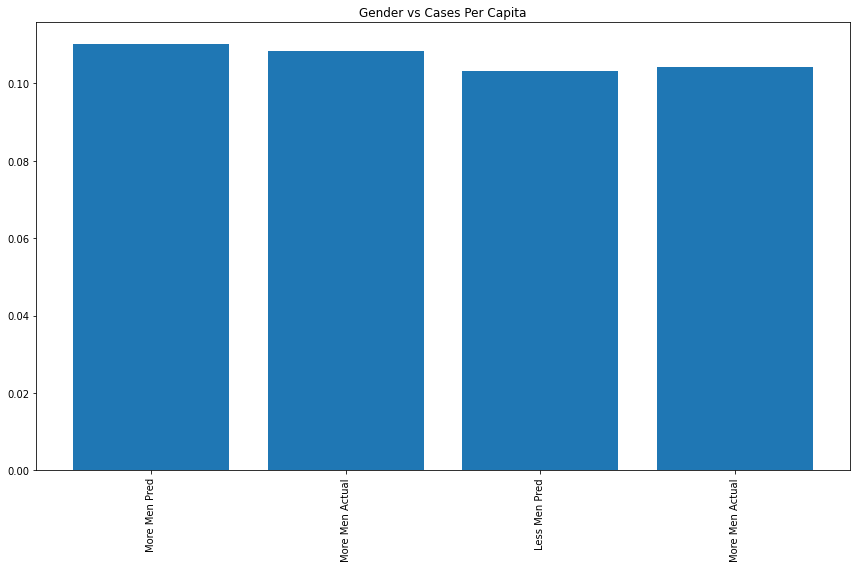

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(range(len(listToPlot)), listToPlot)
plt.xticks(range(len(listToPlot)), listY, rotation=90)
plt.title("Gender vs Cases Per Capita")
plt.tight_layout()

In [ ]:
df_old = df1[df1.median_age_2019 >= 44]
df_old.head()
df_old.size


9856

In [ ]:
df_middle = df1[df1.median_age_2019 > 40]
df_middle = df_middle[df_middle.median_age_2019 < 44]
df_middle.head()
df_middle.size

11132

In [ ]:
df_young = df1[df1.median_age_2019 <= 40]
#df_young = dfyoung[dfyoung.median_age_2019 > 3]
df_young.head()
df_young.size

12474

In [ ]:
predictionAgeOld=df_old["prediction"].mean()
actualAgeOld=df_old["cases_per_capita"].mean()

predictionAgeMiddle=df_middle["prediction"].mean()
actualAgeMiddle=df_middle["cases_per_capita"].mean()

predictionAgeYoung=df_young["prediction"].mean()
actualAgeYoung=df_young["cases_per_capita"].mean()

In [ ]:
listToPlot = [predictionAgeOld, actualAgeOld, predictionAgeMiddle, actualAgeMiddle, predictionAgeYoung, actualAgeYoung]
listY = ["Pred old", "Actual old", "Pred middle", "Actual middle", "Pred Young", "Actual Young"]

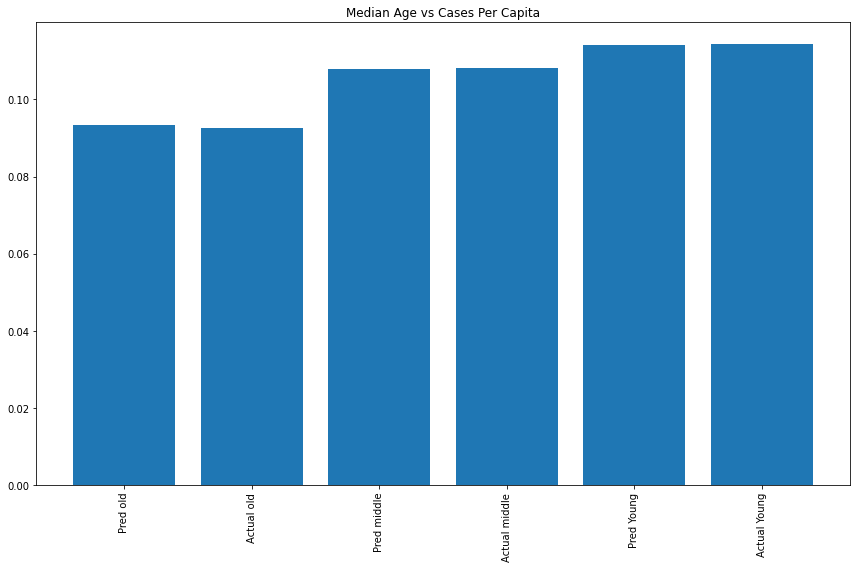

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(range(len(listToPlot)), listToPlot)
plt.xticks(range(len(listToPlot)), listY, rotation=90)
plt.title('Median Age vs Cases Per Capita')
plt.tight_layout()

In [ ]:
df_comp1 = df1[df1.household_has_computer_2019 >= 75]
df_comp1.size


#60, 60-80, 80

10945

In [ ]:
df_comp2 = df1[df1.household_has_computer_2019 > 65]
df_comp2 = df_comp2[df_comp2 < 72]
df_comp2.size

24101

In [ ]:
df_comp3 = df1[df1.household_has_computer_2019 <= 65]
df_comp3.size

9361

In [ ]:
predictionComp1=df_comp1["prediction"].mean()
actualComp1=df_comp1["cases_per_capita"].mean()

predictionComp2=df_comp2["prediction"].mean()
actualComp2=df_comp2["cases_per_capita"].mean()

predictionComp3=df_comp3["prediction"].mean()
actualComp3=df_comp3["cases_per_capita"].mean()

In [ ]:
listToPlot = [predictionComp1, actualComp1, predictionComp2, actualComp2, predictionComp3, actualComp3]
listY = ["Pred 75+", "Actual 75+", "Pred 75-65", "Actual 75-65", "Pred below 65", "Actual below 65"]

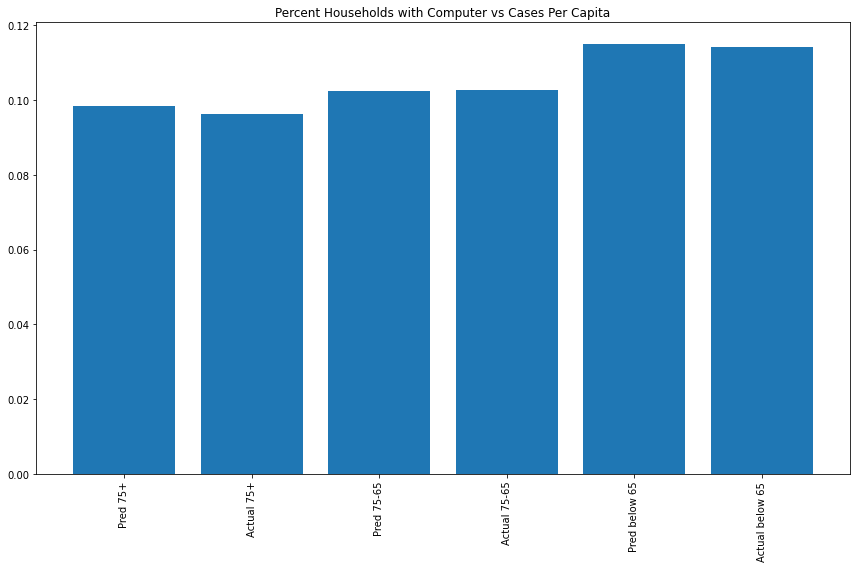

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(range(len(listToPlot)), listToPlot)
plt.xticks(range(len(listToPlot)), listY, rotation=90)
plt.title('Percent Households with Computer vs Cases Per Capita')
plt.tight_layout()